In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
df_history = pd.read_csv("StreamingHistory.csv", parse_dates=["endTime"])

In [39]:
first_played = df_history.drop_duplicates(['artistName',"trackName"], keep='first')

In [2]:
file = r"my_spotify_data\Spotify Account Data\YourLibrary.json"
with open(file,"rb") as f:
    input_data = json.load(f)

In [3]:
data = {"artistName": [], "albumName":[], "trackName": [], "uri":[]}
for track in input_data["tracks"]:
    data["artistName"].append(track["artist"])
    data["albumName"].append(track["album"])
    data["trackName"].append(track["track"])
    data["uri"].append(track["uri"])
df_liked_songs = pd.DataFrame(data)
df_liked_songs.to_csv("liked_songs.csv", index=False)

In [42]:
first_played_liked = first_played.merge(df_liked_songs[['artistName', 'trackName']].drop_duplicates(), on=['artistName', 'trackName'], how='inner')

In [45]:
first_played

,endTime,artistName,trackName,timePlayed
0,2024-06-05 17:23:00,Nora En Pure,Aquatic,39445
1,2024-06-06 10:35:00,Rogue,Let's Talk,10602
3,2024-06-06 10:36:00,King Serenity,All for U (Ameyatchi),13653
4,2024-06-06 10:38:00,Jungeli,Petit génie,122069
5,2024-06-06 10:39:00,David Guetta,Don't Leave Me Alone (feat. Anne-Marie),77525
...,...,...,...,...
13651,2025-06-05 17:42:00,KEPIK,Prism Heart,16542
13652,2025-06-05 17:42:00,Terry Zhong,Home Alright,1625
13656,2025-06-05 17:53:00,David Guetta,Beautiful People,118562
13671,2025-06-05 19:10:00,Near x Far,Not Enough,220572


In [46]:
first_played.to_csv("first_played.csv", index=False)
first_played_liked.to_csv("first_played_liked.csv", index=False)

In [ ]:
liked_not_played = df_history.merge(filtered[['artistName', 'trackName']], on=['artistName', 'trackName'], how='left', indicator=True)
liked_not_played = liked_not_played[liked_not_played['_merge'] == 'left_only'].drop('_merge', axis=1)
liked_not_played

,artistName,trackName
56,Squeezie,Bye Bye
143,Soprano,En feu
145,Kezah,Mirador
344,Imagine Dragons,Thunder
350,Crazy Frog,Tricky
503,Ed Sheeran,Azizam
571,The Chainsmokers,High


In [ ]:
first_played

,endTime,artistName,trackName,timePlayed
0,2024-06-05 17:23:00,Nora En Pure,Aquatic,39445
1,2024-06-06 10:35:00,Rogue,Let's Talk,10602
3,2024-06-06 10:36:00,King Serenity,All for U (Ameyatchi),13653
4,2024-06-06 10:38:00,Jungeli,Petit génie,122069
5,2024-06-06 10:39:00,David Guetta,Don't Leave Me Alone (feat. Anne-Marie),77525
...,...,...,...,...
13651,2025-06-05 17:42:00,KEPIK,Prism Heart,16542
13652,2025-06-05 17:42:00,Terry Zhong,Home Alright,1625
13656,2025-06-05 17:53:00,David Guetta,Beautiful People,118562
13671,2025-06-05 19:10:00,Near x Far,Not Enough,220572


endTime
2024-06-06    29
2024-06-07    15
2024-06-08     1
2024-06-09    14
2024-06-10     7
              ..
2025-06-01     0
2025-06-02     0
2025-06-03     0
2025-06-04     3
2025-06-05     2
Freq: D, Length: 365, dtype: int64


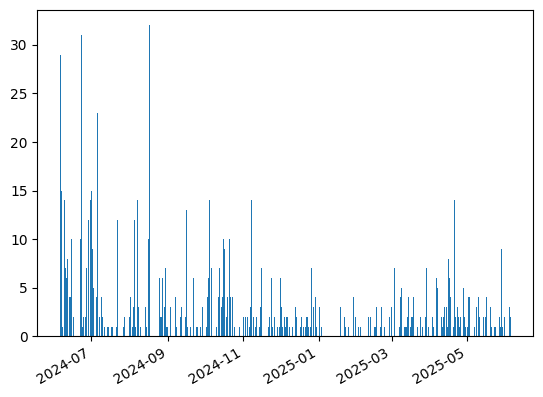

In [47]:
df_groups = first_played_liked.groupby(pd.Grouper(key='endTime', freq="1D"))
df_counts = df_groups.size()
#df_counts.to_csv(f"df_counts_{freq}.csv")
print(df_counts)
plt.bar(df_counts.index,df_counts)
plt.gcf().autofmt_xdate()
plt.show()